In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [ ]:
import cv2
import numpy as np
import requests
from roboflow import Roboflow

# Initialize Roboflow
rf = Roboflow(api_key="******") #insert our own api key
project = rf.workspace().project("accident-prediction-bednd")
model = project.version("1").model

# Predict video
job_id, signed_url, expire_time = model.predict_video(
    "/content/test2.mp4",
    fps=5,
    prediction_type="batch-video",
)

results = model.poll_until_video_results(job_id)

# Process results


loading Roboflow workspace...
loading Roboflow project...
Checking for video inference results for job 78be2bd8-16b8-4c46-953a-89b798e6d4f2 every 60s
(0s): Checking for inference results


In [ ]:
def download_and_draw_boxes(results, input_video_path, output_video_path):
    # Open the input video
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Get the video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Prepare the output video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    # Process each frame in the results
    frame_count = 0
    for frame_data in results['accident-prediction-bednd']:
        ret, frame = cap.read()
        if not ret:
            print(f"Error: Could not read frame {frame_count}.")
            break

        predictions = frame_data['predictions']
        for prediction in predictions:
            x, y, width, height = prediction['x'], prediction['y'], prediction['width'], prediction['height']
            confidence = prediction['confidence']
            label = prediction['class']

            # Define the bounding box
            start_point = (int(x - width / 2), int(y - height / 2))
            end_point = (int(x + width / 2), int(y + height / 2))
            color = (0, 255, 0)
            thickness = 2

            # Draw the bounding box and label on the image
            cv2.rectangle(frame, start_point, end_point, color, thickness)
            cv2.putText(frame, f'{label} ({confidence:.2f})', (start_point[0], start_point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        out.write(frame)
        frame_count += 1

    # Release the video capture and writer objects
    cap.release()
    out.release()

# Call the function to process and save the video
input_video_path = "/content/test2.mp4"
output_video_path = "/content/output_video_with_bounding_boxes.mp4"
download_and_draw_boxes(results, input_video_path, output_video_path)

print(f'Output video saved at {output_video_path}')


Output video saved at /content/output_video_with_bounding_boxes.mp4


In [ ]:
import cv2
import numpy as np
import requests
from IPython.display import HTML
from base64 import b64encode

def download_and_draw_boxes(results, input_video_path, output_video_path):
    # Open the input video
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Get the video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Prepare the output video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    # Process each frame in the results
    frame_count = 0
    for frame_data in results['accident-prediction-bednd']:
        ret, frame = cap.read()
        if not ret:
            print(f"Error: Could not read frame {frame_count}.")
            break

        predictions = frame_data['predictions']
        for prediction in predictions:
            x, y, width, height = prediction['x'], prediction['y'], prediction['width'], prediction['height']
            confidence = prediction['confidence']
            label = prediction['class']

            # Define the bounding box
            start_point = (int(x - width / 2), int(y - height / 2))
            end_point = (int(x + width / 2), int(y + height / 2))
            color = (0, 255, 0)
            thickness = 2

            # Draw the bounding box and label on the image
            cv2.rectangle(frame, start_point, end_point, color, thickness)
            cv2.putText(frame, f'{label} ({confidence:.2f})', (start_point[0], start_point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        out.write(frame)
        frame_count += 1

    # Release the video capture and writer objects
    cap.release()
    out.release()

# Call the function to process and save the video
input_video_path = "/content/test2.mp4"
output_video_path = "/content/test2_result.mp4"
download_and_draw_boxes(results, input_video_path, output_video_path)

# Display the video in Colab
def display_video(video_path):
    video = open(video_path, "rb").read()
    video_b64 = b64encode(video).decode()
    video_tag = f'''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{video_b64}" type="video/mp4">
    </video>
    '''
    return HTML(video_tag)

# Display the processed video
display_video(output_video_path)


In [ ]:
print(results)

{'frame_offset': [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66], 'time_offset': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2], 'accident-prediction-bednd': [{'time': 0.08675349992699921, 'image': {'width': 848, 'height': 480}, 'predictions': []}, {'time': 0.08679661597125232, 'image': {'width': 848, 'height': 480}, 'predictions': [{'x': 332.0, 'y': 270.0, 'width': 222.0, 'height': 148.0, 'confidence': 0.8049078583717346, 'class': 'Accident Detection - v2 2024-01-03 8-27am', 'class_id': 1, 'detection_id': '9e1ca86d-b867-4003-9e69-a05ce78cc66b'}]}, {'time': 0.08680168492719531, 'image': {'width': 848, 'height': 480}, 'predictions': []}, {'time': 0.0868048999691382, 'image': {'width': 848, 'height': 480}, 'predictions': [{'x': 484.0, 'y': 176.5, 'width': 236.0, 'height': 155.0, 'confidence': 0.8588299751281738, 'class': 'Accident Detection - v2 2024-01-03 8-27am', 'class_id': 1, 'detection_id': '5418d55c-22a4-4d79-b8f4-5824d4842566'}]}, {'time': 0.08973140106536448, 'image'

In [ ]:
import cv2
import os

# Sample data
data = {
    'frame_offset': [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66],
    'time_offset': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2],
    'accident-prediction-bednd': [
        {'time': 1.1538232619641349, 'image': {'width': 848, 'height': 480}, 'predictions': []},
        {'time': 1.1538719259551726, 'image': {'width': 848, 'height': 480}, 'predictions': [{'x': 332.0, 'y': 270.0, 'width': 222.0, 'height': 148.0, 'confidence': 0.8049080967903137, 'class': 'Accident Detection - v2 2024-01-03 8-27am', 'class_id': 1, 'detection_id': '41783e7a-a382-4569-9617-4adc00a8846a'}]},
        {'time': 1.1538767389720306, 'image': {'width': 848, 'height': 480}, 'predictions': []},
        {'time': 1.153879536956083, 'image': {'width': 848, 'height': 480}, 'predictions': [{'x': 484.0, 'y': 176.5, 'width': 236.0, 'height': 155.0, 'confidence': 0.8588298559188843, 'class': 'Accident Detection - v2 2024-01-03 8-27am', 'class_id': 1, 'detection_id': 'bcbd38df-3f7f-4eaa-b0b5-5b5d0e2ec0e5'}]},
        {'time': 0.06268772104522213, 'image': {'width': 848, 'height': 480}, 'predictions': [{'x': 516.5, 'y': 165.5, 'width': 229.0, 'height': 131.0, 'confidence': 0.9367045760154724, 'class': 'Accident Detection - v2 2024-01-03 8-27am', 'class_id': 1, 'detection_id': '89cc9ea0-204d-4449-b4e7-fa9bab98d02a'}]},
        {'time': 0.06271202699281275, 'image': {'width': 848, 'height': 480}, 'predictions': [{'x': 539.0, 'y': 162.5, 'width': 234.0, 'height': 121.0, 'confidence': 0.9397533535957336, 'class': 'Accident Detection - v2 2024-01-03 8-27am', 'class_id': 1, 'detection_id': '625fe2f1-b71c-4a02-82b7-7a662b77aa7f'}]},
        {'time': 0.06271648802794516, 'image': {'width': 848, 'height': 480}, 'predictions': [{'x': 556.5, 'y': 158.5, 'width': 235.0, 'height': 119.0, 'confidence': 0.9366760849952698, 'class': 'Accident Detection - v2 2024-01-03 8-27am', 'class_id': 1, 'detection_id': '63989d33-cf0f-4cf6-b636-6ec209000f70'}]},
        {'time': 0.06271958199795336, 'image': {'width': 848, 'height': 480}, 'predictions': [{'x': 573.0, 'y': 155.5, 'width': 228.0, 'height': 111.0, 'confidence': 0.8650620579719543, 'class': 'Accident Detection - v2 2024-01-03 8-27am', 'class_id': 1, 'detection_id': 'a5e88292-a45c-4483-9efd-f5cf0c887e07'}]},
        {'time': 0.06127646297682077, 'image': {'width': 848, 'height': 480}, 'predictions': []},
        {'time': 0.061300577013753355, 'image': {'width': 848, 'height': 480}, 'predictions': [{'x': 593.0, 'y': 150.0, 'width': 218.0, 'height': 106.0, 'confidence': 0.46896398067474365, 'class': 'Accident Detection - v2 2024-01-03 8-27am', 'class_id': 1, 'detection_id': '075793b9-454c-4625-9d0d-3232564453c5'}]},
        {'time': 0.06130472099175677, 'image': {'width': 848, 'height': 480}, 'predictions': [{'x': 595.5, 'y': 150.0, 'width': 221.0, 'height': 106.0, 'confidence': 0.574699342250824, 'class': 'Accident Detection - v2 2024-01-03 8-27am', 'class_id': 1, 'detection_id': '5b896d4f-0275-4fc3-a6b5-ddba4ae09fe0'}]},
        {'time': 0.061307472991757095, 'image': {'width': 848, 'height': 480}, 'predictions': [{'x': 179.0, 'y': 252.5, 'width': 198.0, 'height': 125.0, 'confidence': 0.6645912528038025, 'class': 'Accident Detection - v2 2024-01-03 8-27am', 'class_id': 1, 'detection_id': 'b7c68968-3f9e-4600-b3d4-5bf4703b00b3'}]}
    ]
}

# Directory to save frames
output_dir = 'frames'
os.makedirs(output_dir, exist_ok=True)

# Path to the local video file



In [ ]:
video_path = '/content/output_video_with_bounding_boxes.mp4'

# Function to get the frame at a specific time
def get_frame_at_time(video_path, time):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_number = int(time * fps)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    cap.release()
    if ret:
        return frame
    else:
        return None

# Process data to save frames with confidence > 0.90
for item in data['accident-prediction-bednd']:
    for prediction in item['predictions']:
        if prediction['confidence'] > 0.600:
            frame = get_frame_at_time(video_path, item['time'])
            if frame is not None:
                frame_filename = f"frame_{item['time']:.2f}.png"
                cv2.imwrite(os.path.join(output_dir, frame_filename), frame)
                print(f"Saved frame at time {item['time']} with confidence {prediction['confidence']}")

print("Frames extraction completed.")

Saved frame at time 0.06268772104522213 with confidence 0.9367045760154724
Saved frame at time 0.06271202699281275 with confidence 0.9397533535957336
Saved frame at time 0.06271648802794516 with confidence 0.9366760849952698
Saved frame at time 0.06271958199795336 with confidence 0.8650620579719543
Saved frame at time 0.061307472991757095 with confidence 0.6645912528038025
Frames extraction completed.


Saved frame at time 0.06268772104522213 with confidence 0.9367045760154724


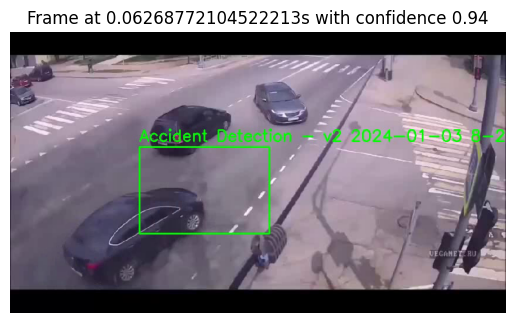

Saved frame at time 0.06271202699281275 with confidence 0.9397533535957336


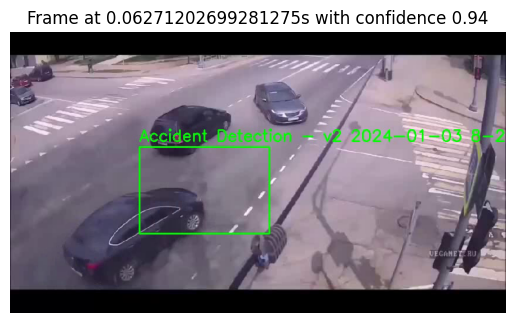

Saved frame at time 0.06271648802794516 with confidence 0.9366760849952698


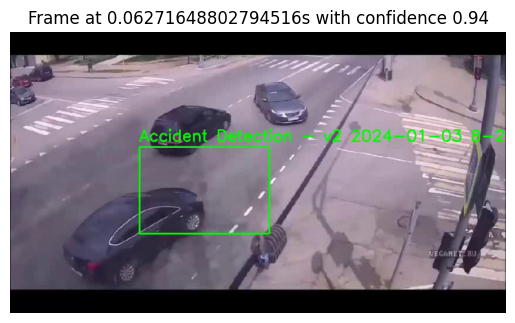

Frames extraction completed.


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

video_path = '/content/output_video_with_bounding_boxes.mp4'

# Function to get the frame at a specific time
def get_frame_at_time(video_path, time):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_number = int(time * fps)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    cap.release()
    if ret:
        return frame
    else:
        return None

# Process data to save frames with confidence > 0.80
for item in data['accident-prediction-bednd']:
    for prediction in item['predictions']:
        if prediction['confidence'] > 0.90:
            frame = get_frame_at_time(video_path, item['time'])
            if frame is not None:
                frame_filename = f"frame_{item['time']:.2f}.png"
                cv2.imwrite(os.path.join(output_dir, frame_filename), frame)
                print(f"Saved frame at time {item['time']} with confidence {prediction['confidence']}")

                # Convert the frame from BGR to RGB for displaying with matplotlib
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                # Display the frame using matplotlib
                plt.imshow(frame_rgb)
                plt.title(f"Frame at {item['time']}s with confidence {prediction['confidence']:.2f}")
                plt.axis('off')
                plt.show()

print("Frames extraction completed.")


In [ ]:
pip install opencv-python-headless requests

In [ ]:
for item in data['accident-prediction-bednd']:
    for prediction in item['predictions']:
        if prediction['confidence'] > 0.80:
            frame = get_frame_at_time(video_path, item['time'])
            if frame is not None:
                frame_filename = f"frame_{item['time']:.2f}.png"
                cv2.imwrite(os.path.join(output_dir, frame_filename), frame)
                print(f"Saved frame at time {item['time']} with confidence {prediction['confidence']}")

print("Frames extraction completed.")

Saved frame at time 0.06268772104522213 with confidence 0.9367045760154724
Saved frame at time 0.06271202699281275 with confidence 0.9397533535957336
Saved frame at time 0.06271648802794516 with confidence 0.9366760849952698
Saved frame at time 0.06271958199795336 with confidence 0.8650620579719543
Frames extraction completed.


Error: Could not retrieve frame at time 1.1538719259551726.
Error: Could not retrieve frame at time 1.153879536956083.
Saved frame at time 0.06268772104522213 with confidence 0.9367045760154724


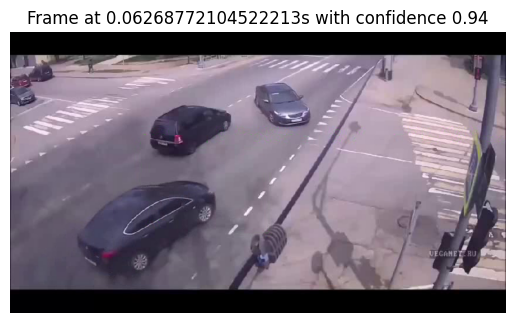

Saved frame at time 0.06271202699281275 with confidence 0.9397533535957336


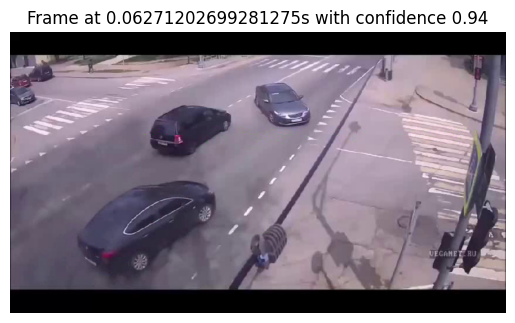

Saved frame at time 0.06271648802794516 with confidence 0.9366760849952698


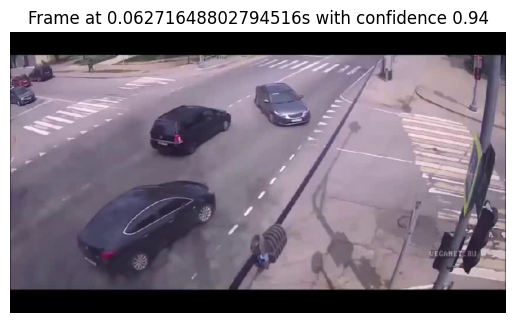

Saved frame at time 0.06271958199795336 with confidence 0.8650620579719543


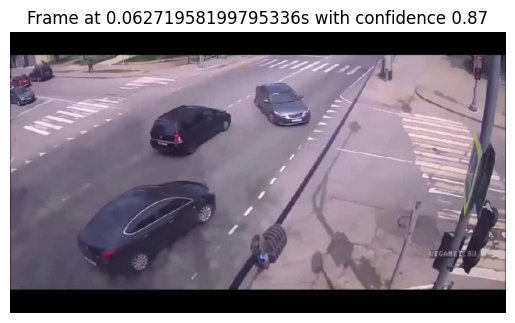

Frames extraction completed.


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

def get_frame_at_time(video_path, time):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return None

    # Set the position of the video to the specified time
    cap.set(cv2.CAP_PROP_POS_MSEC, time * 1000)

    # Read the frame at the specified position
    ret, frame = cap.read()

    # Release the video capture object
    cap.release()

    if ret:
        return frame
    else:
        print(f"Error: Could not retrieve frame at time {time}.")
        return None

# Assuming data, video_path, and output_dir are already defined
for item in data['accident-prediction-bednd']:
    for prediction in item['predictions']:
        if prediction['confidence'] > 0.80:
            frame = get_frame_at_time(video_path, item['time'])
            if frame is not None:
                frame_filename = f"frame_{item['time']:.2f}.png"
                cv2.imwrite(os.path.join(output_dir, frame_filename), frame)
                print(f"Saved frame at time {item['time']} with confidence {prediction['confidence']}")

                # Convert the frame from BGR to RGB for displaying with matplotlib
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                # Display the frame using matplotlib
                plt.imshow(frame_rgb)
                plt.title(f"Frame at {item['time']}s with confidence {prediction['confidence']:.2f}")
                plt.axis('off')
                plt.show()

print("Frames extraction completed.")


In [ ]:
pip install twilio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.7 MB/s eta 0:00:00


In [ ]:
from twilio.rest import Client

account_sid = 'ABOAODOAWH' #insert your account's sid
auth_token = 'AWD8203' #insert your account's auth token
client = Client(account_sid, auth_token)

for item in results['accident-prediction-bednd']:
    for prediction in item['predictions']:
        if prediction['confidence'] > 0.90:
            print(f"Accident detected at time {item['time']}s with confidence {prediction['confidence']:.2f}")
            print(f"Details: {prediction}")

            call = client.calls.create(
                twiml='<Response><Say> There has been an accident and Vinay has died in that accident. Please call the ambulance as soon as possible.</Say></Response>',
                to='+389749234', #add your needed phone number
                from_='+23829380' #add your account's number
            )

            print("Call initiated")
            break
    else:
        continue
    break

print("Processing completed.")


Accident detected at time 0.10988099803216755s with confidence 0.94
Details: {'x': 516.5, 'y': 165.5, 'width': 229.0, 'height': 131.0, 'confidence': 0.9367045760154724, 'class': 'Accident Detection - v2 2024-01-03 8-27am', 'class_id': 1, 'detection_id': '4aa0bc1a-c8cf-455a-b365-49140cd0acf4'}
Call initiated
Processing completed.
